# Gravitational potential and field of a binary star system

Analytical solution to Laplace's equation

In [8]:
%matplotlib widget
import sys
from pathlib import Path

sys.path.insert(0, str(Path.cwd().parent))

import numpy as np
import matplotlib.pyplot as plt
from scripts.plotters import *
from scripts.solvers import *

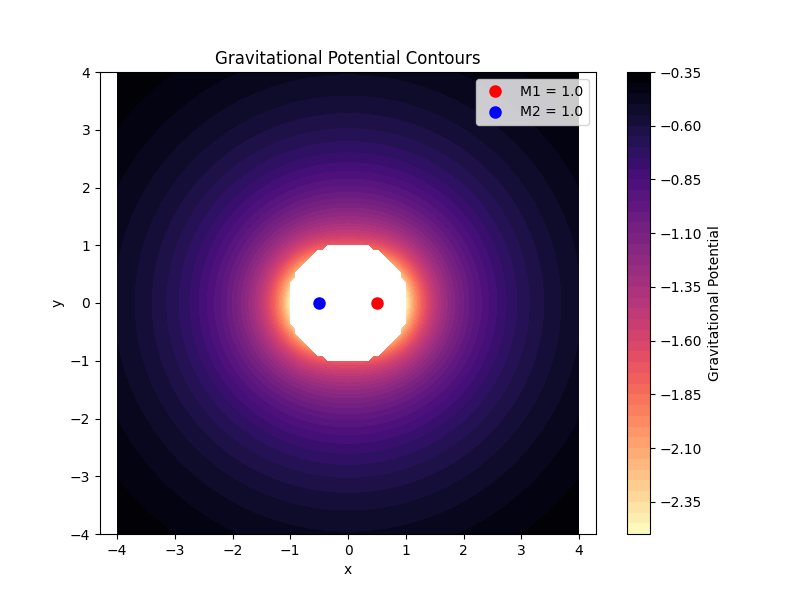

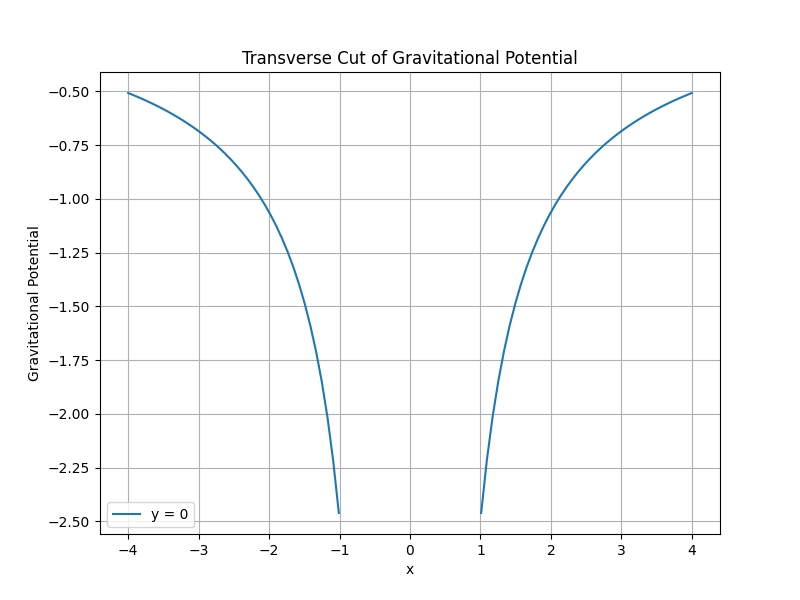

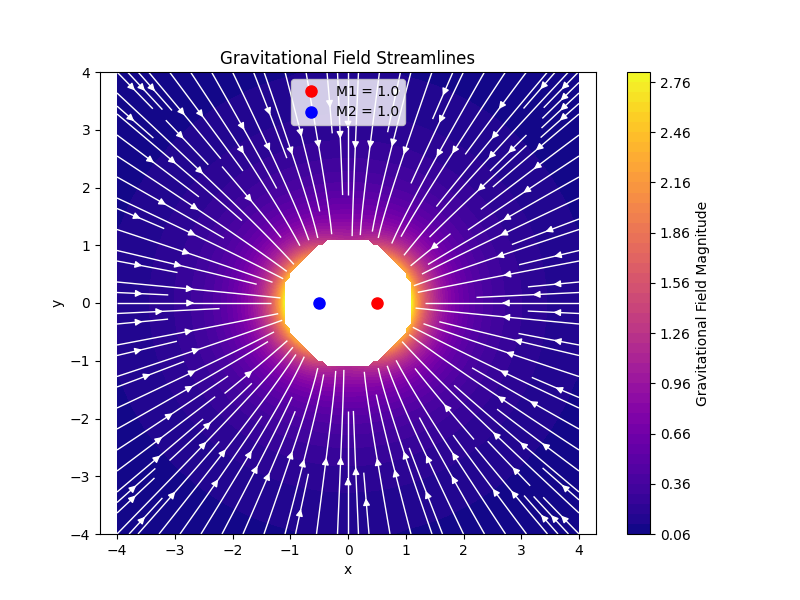

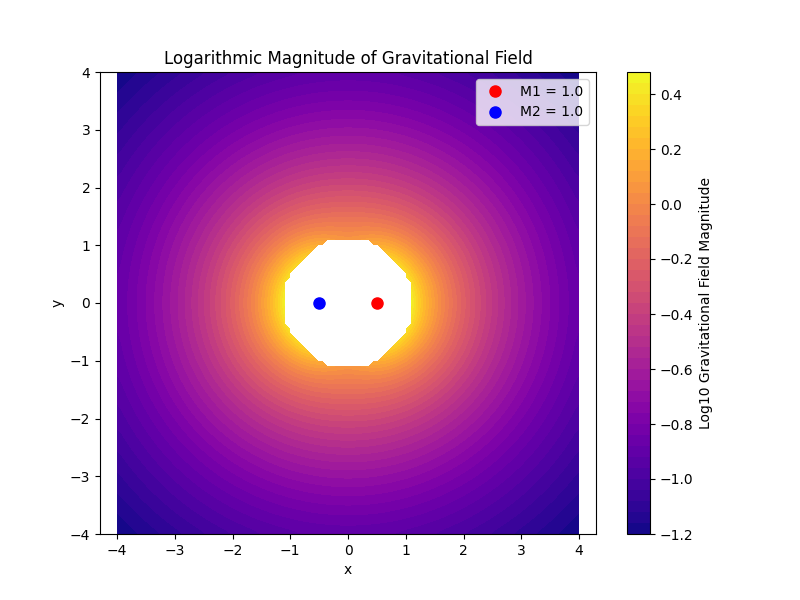

In [9]:
# Parameters 

M1 = 1.0  # Mass of the primary star
M2 = 1.0  # Mass of the secondary star 
a = 1.0   # Separation between the two stars
G = 1.0   # Gravitational constant

size = 4.0  # Size of the plotting region
res = 100   # Resolution of the grid
n_terms = 3  # Number of terms in the multipole expansion

x = np.linspace(-size, size, res)
y = np.linspace(-size, size, res)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

Phi = np.zeros_like(R)

for i in range(res):
    for j in range(res):
        if R[i, j] > a:
            Phi[i, j] = binary_potential_laplace(R[i, j], Theta[i, j], M1, M2, a, G, n_terms)
        else:
            Phi[i, j] = np.nan  # Inside the binary separation, potential is undefined in this model

plot_potential_contours(Phi, M1, M2, a, size, res, levels=50)
plot_potential_transverse(Phi, x, y, y0=0)

g_x, g_y = binary_field_laplace(Phi, X, Y)
plot_field_streamlines(g_x, g_y, X, Y, M1, M2, a, density=1.5)
plot_field_log_magnitude(g_x, g_y, X, Y, M1, M2, a)